In [ ]:
# Import libraries
import pandas as pd
from pandas.plotting import scatter_matrix
import numpy as np
import matplotlib.pyplot as plt
import os
from imblearn.over_sampling import RandomOverSampler
from collections import Counter
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn import metrics

In [ ]:
# load dataset
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# load dataset
df = pd.read_csv("/content/drive/Fraud-Detection.csv")
# View top 5 records
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


Histograms for 31 attributes presented in the credit-card dataset including amount, class, time, V1 to V28 



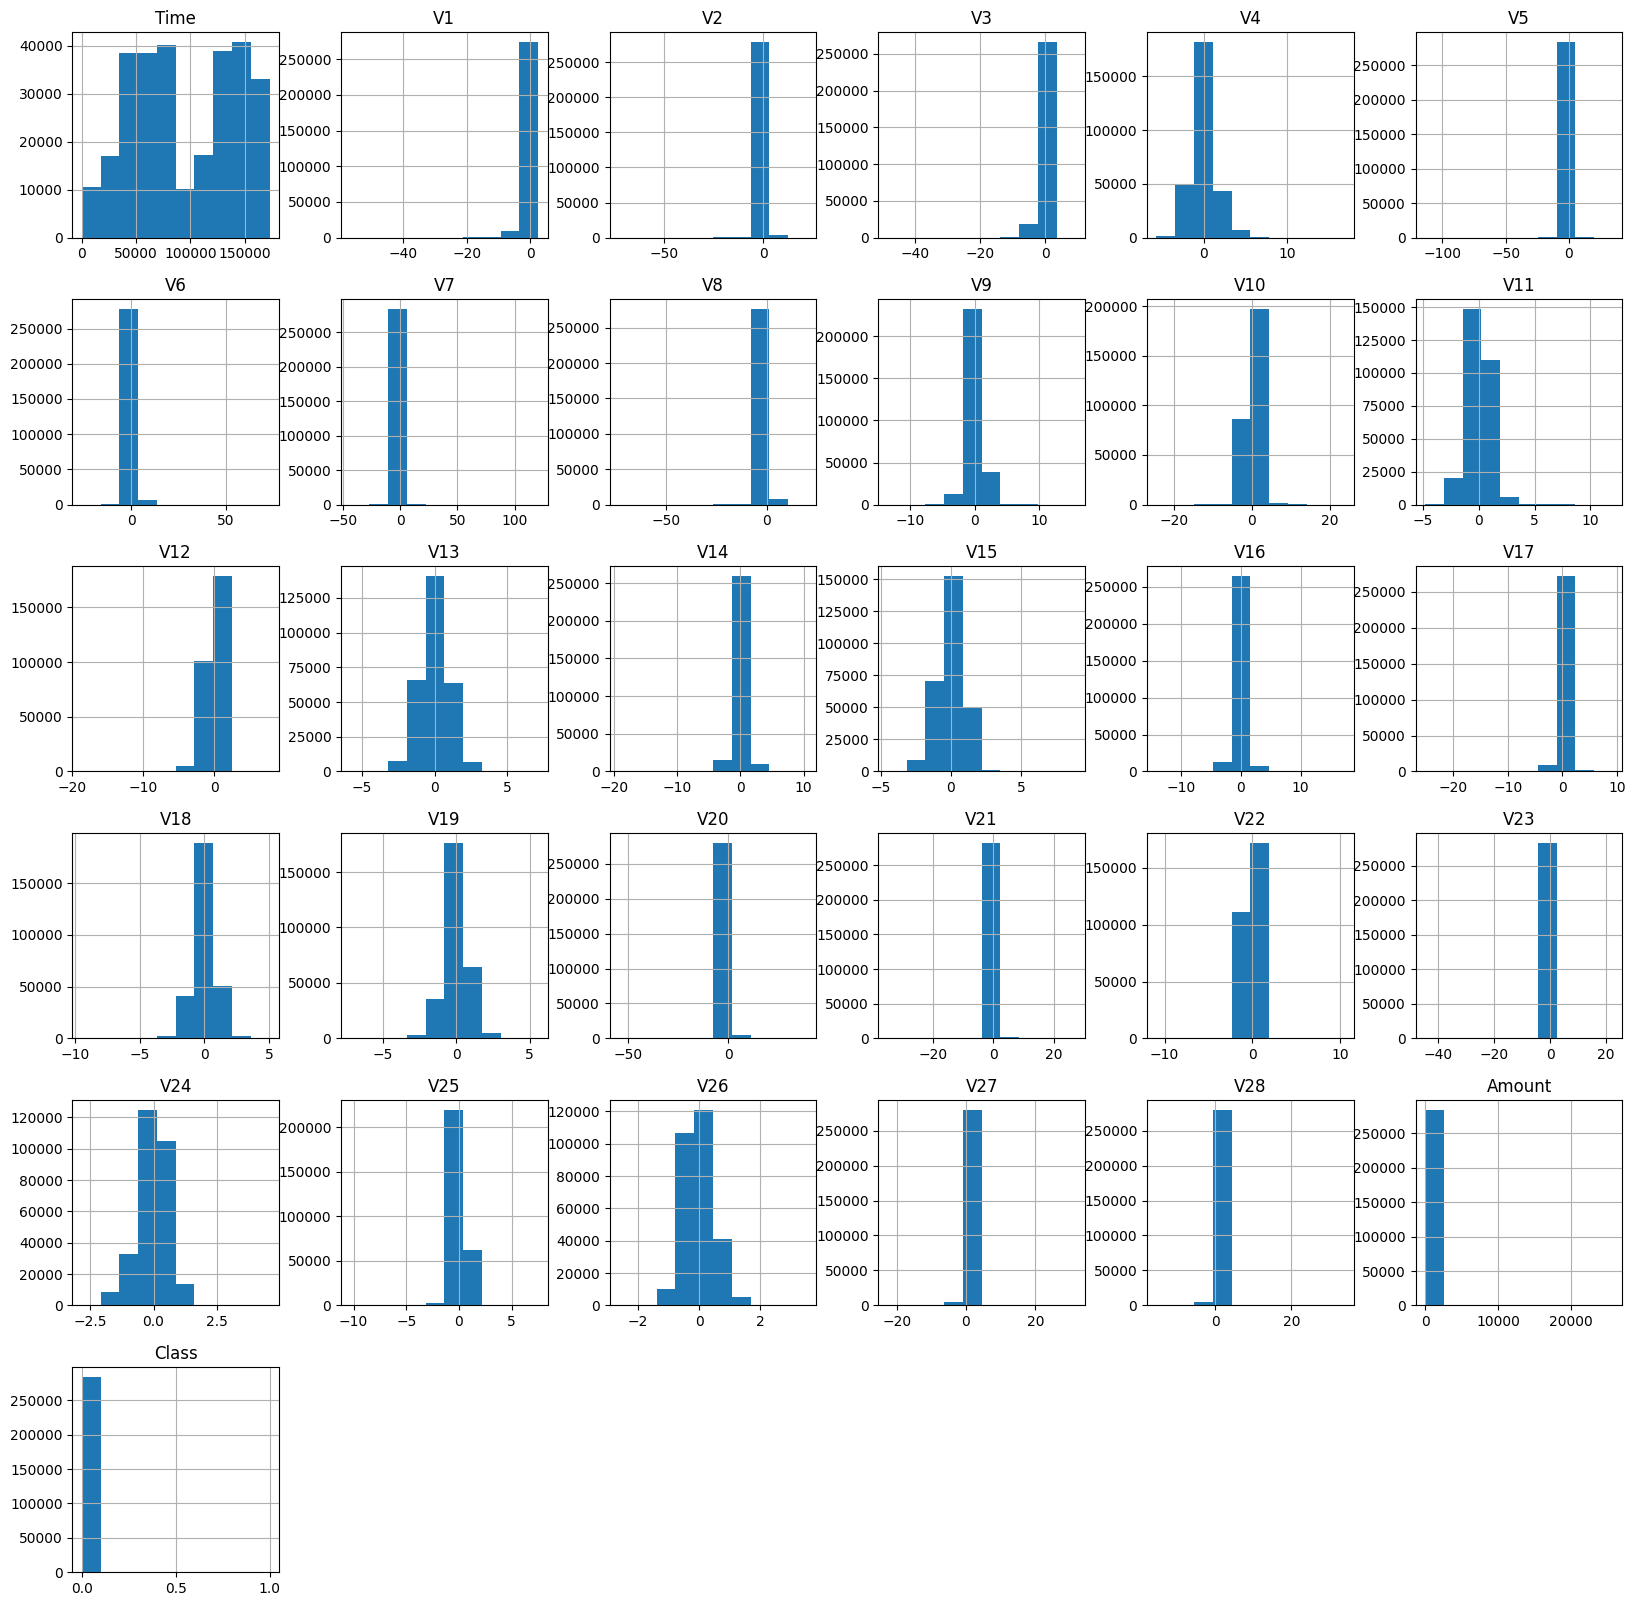

In [ ]:
print("Histograms for 31 attributes presented in the credit-card dataset including amount, class, time, V1 to V28 \n")
hist = df.hist(figsize = (20,20))

In [ ]:
# determine the number of records in the dataset
print('The dataset contains {0} rows and {1} columns.'.format(df.shape[0], df.shape[1]))

The dataset contains 284807 rows and 31 columns.


In [ ]:
# check for missing values and data types of the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [ ]:
# label class
print('Normal transactions count: ', df['Class'].value_counts().values[0])
print('Fraudulent transactions count: ', df['Class'].value_counts().values[1])

Normal transactions count:  284315
Fraudulent transactions count:  492


In [ ]:
# Separate feature data from labels
X = df.iloc[:, :-1]
# label class
y = df['Class']

In [ ]:
# preprocess
# normalization of the data to work properly
scaler = StandardScaler()
scaled_X = scaler.fit_transform(X)

# Partition data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(scaled_X, y, test_size=0.3, random_state=42)

# apply over-sampling
ros = RandomOverSampler()
print('Original dataset shape {}'.format(Counter(y_train)))
X_res, y_res = ros.fit_resample(X_train, y_train)
print('Resampled dataset shape {}'.format(Counter(y_res)))

Original dataset shape Counter({0: 199008, 1: 356})
Resampled dataset shape Counter({0: 199008, 1: 199008})


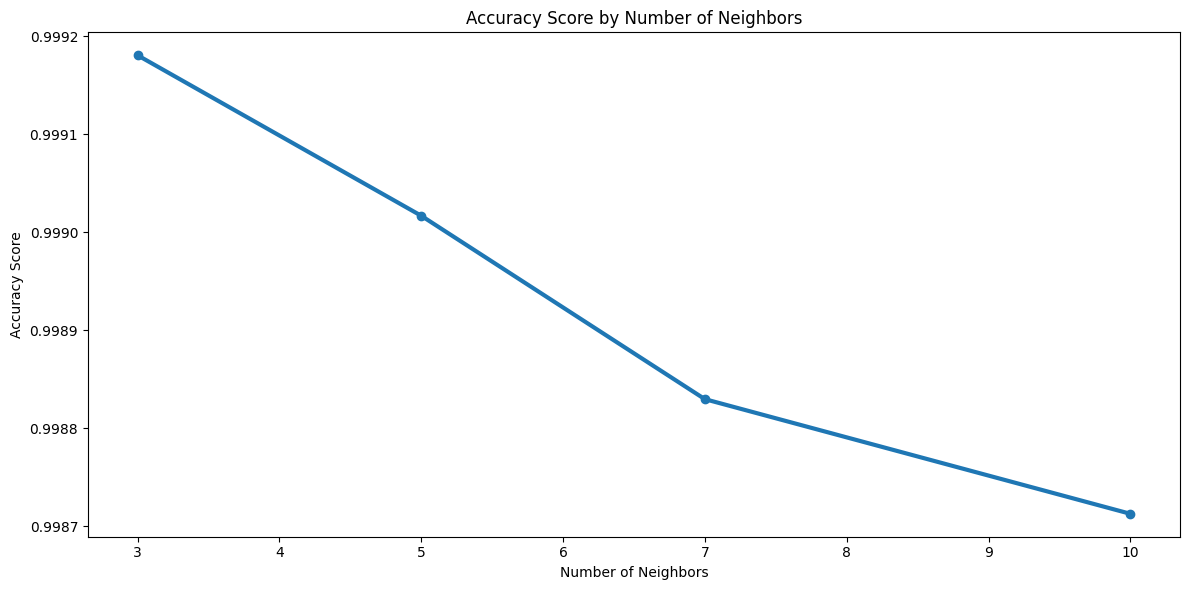

The best accuracy was 0.9992 with k=3.


In [ ]:
X_train, y_train = X_res, y_res
Ks = [3,5,7,10]
acc_knn = np.zeros((len(Ks)))
i=0

for k in Ks:

    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)

    y_pred_knn = knn.predict(X_test)

    acc_knn[i] = metrics.accuracy_score(y_test, y_pred_knn)
    i=i+1

fig, ax = plt.subplots(figsize=(12,6))
ax.plot(Ks, acc_knn, linewidth=3, marker='o')
ax.set_title('Accuracy Score by Number of Neighbors')
ax.set_ylabel('Accuracy Score')
ax.set_xlabel('Number of Neighbors')
ax.grid(False)

plt.tight_layout()
plt.show()

best_k = Ks[acc_knn.argmax()]
print(f'The best accuracy was {round(acc_knn.max(), 4)} with k={best_k}.')

In [ ]:
# train models
# Logistic Regression, RandomForest, Naive Baye and K-nearest Neighbors classifiers
X_train, y_train = X_res, y_res

# Train LogisticRegression Model
LGR_Classifier = LogisticRegression()
LGR_Classifier.fit(X_train, y_train)

# Train RandomForest Classifier Model
RDF_Classifier = RandomForestClassifier(random_state=0)
RDF_Classifier.fit(X_train, y_train)

# Train Bernoulli Naive Baye Model
BNB_Classifier = BernoulliNB()
BNB_Classifier.fit(X_train, y_train)

# Train K-nearest Neighbors Model
KNN_Classifier = KNeighborsClassifier(n_neighbors=best_k)
KNN_Classifier.fit(X_train, y_train)


KNeighborsClassifier(n_neighbors=3)

In [ ]:
# function for plotting confusion matrix
def plot_confusion_matrix(cm, classes, title, cmap):
    plt.clf()
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    classnames = classes
    plt.title(title)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    tick_marks = np.arange(len(classnames))
    plt.xticks(tick_marks, classnames, rotation=45)
    plt.yticks(tick_marks, classnames)
    s = [['TN', 'FP'], ['FN', 'TP']]

    for i in range(2):
        for j in range(2):
            plt.text(j, i,  str(cm[i][j]))
    plt.show()


# function to plot roc_auc
def plot_roc_auc(arg1, arg2, arg3):
    fig, ax = plt.subplots(figsize=(8, 6))
    for i, v in arg1:
        y_score = v.predict_proba(arg2)[:, 1]
        fpr, tpr, _ = metrics.roc_curve(arg3, y_score)
        roc_auc = metrics.auc(fpr, tpr)
        plt.plot(fpr, tpr, lw=2, label=i + ' (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc="lower right")
    plt.show()



========================== Model Test Results ========================

=== RandomForest Classifier ===
Model Accuracy:  100.0%

Confusion Matrix:
 [[85303     4]
 [   25   111]]



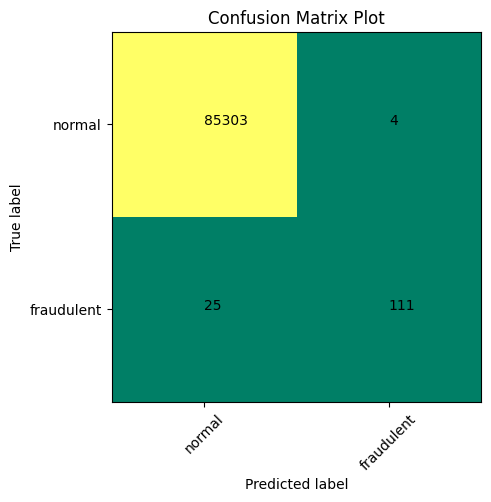


Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85307
           1       0.97      0.82      0.88       136

    accuracy                           1.00     85443
   macro avg       0.98      0.91      0.94     85443
weighted avg       1.00      1.00      1.00     85443


=== Logistic Regression ===
Model Accuracy:  97.39999999999999%

Confusion Matrix:
 [[83125  2182]
 [   10   126]]



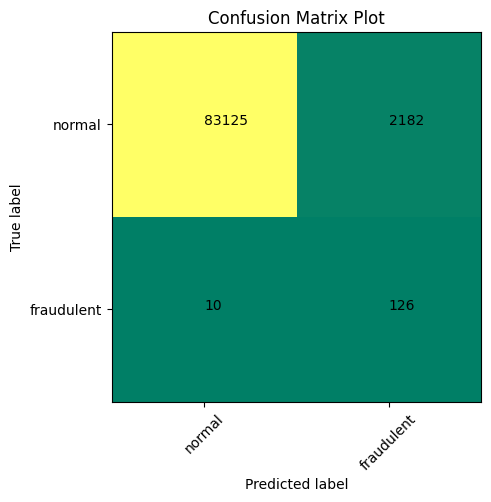


Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.97      0.99     85307
           1       0.05      0.93      0.10       136

    accuracy                           0.97     85443
   macro avg       0.53      0.95      0.55     85443
weighted avg       1.00      0.97      0.99     85443


=== K-Neighbors Classifier ===
Model Accuracy:  99.9%

Confusion Matrix:
 [[85258    49]
 [   21   115]]



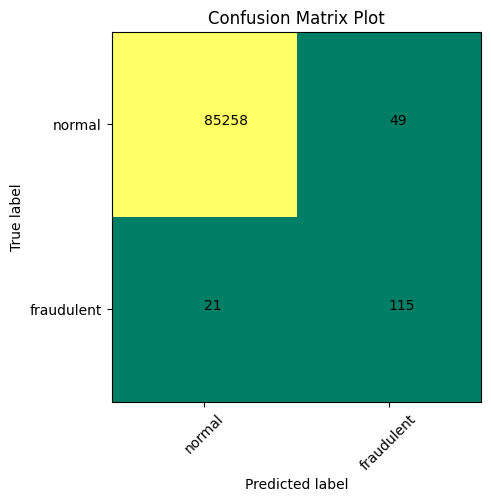


Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85307
           1       0.70      0.85      0.77       136

    accuracy                           1.00     85443
   macro avg       0.85      0.92      0.88     85443
weighted avg       1.00      1.00      1.00     85443


=== Naive Baiye Classifier ===
Model Accuracy:  99.1%

Confusion Matrix:
 [[84532   775]
 [   18   118]]



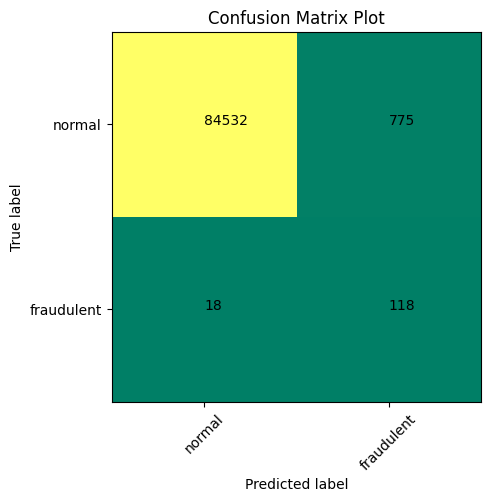


Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      1.00     85307
           1       0.13      0.87      0.23       136

    accuracy                           0.99     85443
   macro avg       0.57      0.93      0.61     85443
weighted avg       1.00      0.99      0.99     85443


============================= ROC Curve ===============================



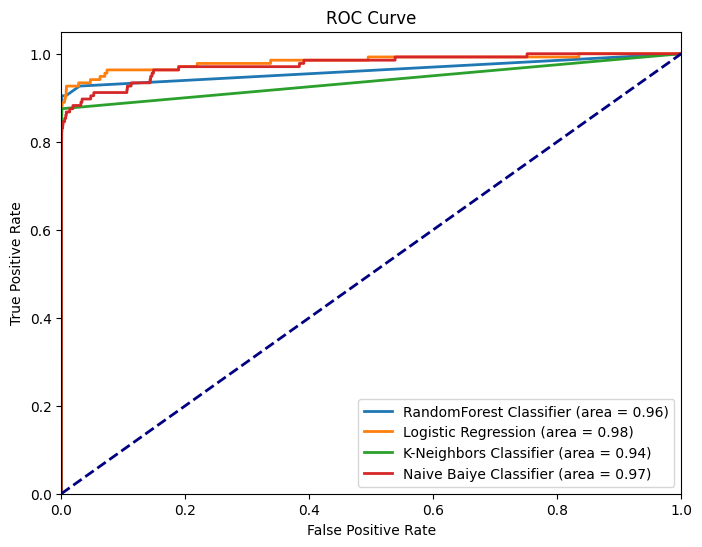

In [ ]:
# Test models

modlist = [('RandomForest Classifier', RDF_Classifier),('Logistic Regression', LGR_Classifier),
('K-Neighbors Classifier', KNN_Classifier),('Naive Baiye Classifier', BNB_Classifier)]

models = [j for j in modlist]
classdict = {'normal':0, 'fraudulent':1}
print()
print('========================== Model Test Results ========================' "\n")

for i, v in models:
    accuracy = metrics.accuracy_score(y_test, v.predict(X_test))
    confusion_matrix = metrics.confusion_matrix(y_test, v.predict(X_test))
    classification = metrics.classification_report(y_test, v.predict(X_test))
    print('=== {} ==='.format(i))
    print ("Model Accuracy: ",  '{}%'.format(np.round(accuracy, 3) * 100))
    print()
    print("Confusion Matrix:" "\n", confusion_matrix)
    print()
    plot_confusion_matrix(confusion_matrix, classes = list(classdict.keys()), title='Confusion Matrix Plot', cmap=plt.cm.summer)
    print()
    print("Classification Report:" "\n", classification)
    print()

print('============================= ROC Curve ===============================' "\n")
plot_roc_auc(arg1=models, arg2=X_test, arg3=y_test)